In [1]:
###Electric Vehicle Charging Stations in Canada: Data Analysis and Visualization
#Prepared by: Aakash Shiket
#Contact: aakash.shiket@outlook.com

In [ ]:
##Data Source:
#The dataset used in this analysis was obtained from Natural Resources Canada’s 
#(NRCan) open data portal: Electric Charging and Alternative Fuelling Stations Locator.

In [3]:
## Objective
#This project analyzes electric vehicle (EV) charging station data in Canada using the dataset provided by Natural Resources Canada (NRCan).

## Key Findings:
#- Growth Trends: A significant rise in EV charging stations since 2019, reflecting increased adoption of electric vehicles.
#- Regional Insights: Provinces like Quebec, Ontario, and British Columbia lead in both Level 2 and DC fast charging infrastructure.
#- Connector Types: The J1772 connector dominates the charging network, followed by CHAdeMO and CCS connectors.
#- Top Charging Networks: Flo, Tesla, and Circuit électrique dominate the Canadian EV market.

## Impact:
#This analysis highlights Canada’s readiness to support the growing EV market, with strong investments in both standard and fast charging infrastructure.
#It also identifies gaps in charging accessibility in smaller provinces, providing actionable insights for future network expansion.


In [139]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the NRCan dataset
data_file = "data.csv"  # Replace with your CSV file's path
df = pd.read_csv("data.csv",low_memory=False)

# Check the dataset information
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31562 entries, 0 to 31561
Data columns (total 83 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           31562 non-null  object 
 1   Station Name                             31562 non-null  object 
 2   Street Address                           31562 non-null  object 
 3   Intersection Directions                  3415 non-null   object 
 4   City                                     31562 non-null  object 
 5   State                                    31562 non-null  object 
 6   ZIP                                      31562 non-null  object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            31185 non-null  object 
 9   Status Code                              31562 non-null  object 
 10  Expected Date                            0 non

In [141]:
# Step 1: Identifying Null Values in the Dataset
# This step helps us find missing data in each column to decide on further cleaning actions
null_values = df.isnull().sum()  # Count of null values in each column
print(null_values)

Fuel Type Code                                 0
Station Name                                   0
Street Address                                 0
Intersection Directions                    28147
City                                           0
State                                          0
ZIP                                            0
Plus4                                      31562
Station Phone                                377
Status Code                                    0
Expected Date                              31562
Groups With Access Code                        0
Access Days Time                            3207
Cards Accepted                             28123
BD Blends                                  31562
NG Fill Type Code                          31562
NG PSI                                     31562
EV Level1 EVSE Num                         31506
EV Level2 EVSE Num                          5502
EV DC Fast Count                           25009
EV Other Info       

In [143]:
pd.set_option('display.max_rows', None)

In [145]:
# Calculate the percentage of missing data for better understanding
total_rows = len(df)  # Total number of rows in the dataset
null_percentage = (null_values / total_rows) * 100  # Percentage of missing data
print(null_percentage)

Fuel Type Code                               0.000000
Station Name                                 0.000000
Street Address                               0.000000
Intersection Directions                     89.180027
City                                         0.000000
State                                        0.000000
ZIP                                          0.000000
Plus4                                      100.000000
Station Phone                                1.194474
Status Code                                  0.000000
Expected Date                              100.000000
Groups With Access Code                      0.000000
Access Days Time                            10.160953
Cards Accepted                              89.103986
BD Blends                                  100.000000
NG Fill Type Code                          100.000000
NG PSI                                     100.000000
EV Level1 EVSE Num                          99.822571
EV Level2 EVSE Num          

In [147]:
# Remove columns with more than 80% missing data (example threshold)
columns_to_drop = null_percentage[null_percentage > 80].index  # Identify columns to drop
df = df.drop(columns=columns_to_drop, axis=1)  # Drop the identified columns
print(f"Columns dropped: {list(columns_to_drop)}")

Columns dropped: ['Intersection Directions', 'Plus4', 'Expected Date', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Other Info', 'Federal Agency ID', 'Federal Agency Name', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'Intersection Directions (French)', 'BD Blends (French)', 'Hydrogen Is Retail', 'Access Detail Code', 'Federal Agency Code', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends', 'EV Pricing', 'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class', 'LNG Vehicle Class', 'EV On-Site Renewable Source', 'Restricted Access', 'RD Blends', 'RD Blends (French)', 'RD Blended with Biodiesel', 'RD Maximum Biodiesel Level', 'NPS Unit Name', 'CNG Station Sells Renewable Natural Gas', 'LNG Station Sells Renewabl

In [149]:
df.info() #checking the info after dropping key columns comtaining null values >80%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31562 entries, 0 to 31561
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    31562 non-null  object 
 1   Station Name                      31562 non-null  object 
 2   Street Address                    31562 non-null  object 
 3   City                              31562 non-null  object 
 4   State                             31562 non-null  object 
 5   ZIP                               31562 non-null  object 
 6   Station Phone                     31185 non-null  object 
 7   Status Code                       31562 non-null  object 
 8   Groups With Access Code           31562 non-null  object 
 9   Access Days Time                  28355 non-null  object 
 10  EV Level2 EVSE Num                26060 non-null  float64
 11  EV DC Fast Count                  6553 non-null   float64
 12  EV N

In [151]:
df.head() #getting top few rows in th dataset 

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,...,Access Days Time (French),Groups With Access Code (French),Access Code,Facility Type,EV Workplace Charging,EV J1772 Connector Count,EV J1772 Power Output (kW),EV CCS Connector Count,EV CHAdeMO Connector Count,EV J3400 Connector Count
0,ELEC,Ramada,1319 2nd St W,Brooks,AB,T1R 1P7,403-362-6440,E,Public - Call ahead,24 hours daily; see front desk for access,...,24 heures par jour; voire le concierge pour accès,Public - Appeler à l'avance,public,HOTEL,False,1,NaN,0,0,0
1,ELEC,Davis Chevrolet,149 E Lake Crescent NE,Airdrie,AB,T4A 2H9,403-948-6909,E,Public,24 hours daily; for client use only,...,24 heures par jour; à l'usage des clients seul...,Public,public,CAR_DEALER,False,1,NaN,0,0,0
2,ELEC,Gasonic Instruments,8-823 41st Ave NE,Calgary,AB,T2E 6Y3,403-276-2201,E,Public - Limited hours,8am-5pm M-F; remaining hours and all weekends ...,...,8:00-17:00 LUN-VEN; disponible au public le re...,Public - Heures limitées,public,OFFICE_BLDG,True,1,NaN,0,0,0
3,ELEC,International Motor Cars,7220 Railway St SE,Calgary,AB,T2H 3A8,844-288-8918,E,Public - Call ahead,24 hours daily,...,Accessible 24 heures par jour,Public - Appeler à l'avance,public,CAR_DEALER,False,1,NaN,0,0,0
4,ELEC,Residence Inn,3710 Market St SE,Calgary,AB,T3M 2P2,587-349-8633,E,Public,24 hours daily; for guest use only; parking fe...,...,24 heures par jour; des clients seulement; fra...,Public,public,HOTEL,False,1,NaN,0,0,0


In [153]:
# Dropping irrelevant columns that are not needed for the analysis
columns_to_remove = [
    'Station Phone',              # Contact details, not relevant for analysis
    'Groups With Access Code',    # Access code information, likely not useful
    'EV Network Web',             # Website links, not needed
    'Geocode Status',             # Geocoding status, unnecessary for the objectives
    'ID',                         # Unique ID, no analytical value
    'Access Days Time (French)',  # French duplicate of 'Access Days Time'
    'Groups With Access Code (French)', # French duplicate of access-related column
]

# Drop the columns from the dataset
df = df.drop(columns=columns_to_remove, axis=1)

# Check the updated DataFrame
print(f"Remaining columns: {df.columns}")


Remaining columns: Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Status Code', 'Access Days Time', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Network', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code', 'Open Date',
       'EV Connector Types', 'Country', 'Access Code', 'Facility Type',
       'EV Workplace Charging', 'EV J1772 Connector Count',
       'EV J1772 Power Output (kW)', 'EV CCS Connector Count',
       'EV CHAdeMO Connector Count', 'EV J3400 Connector Count'],
      dtype='object')


In [155]:
# Extracting the year from 'Open Date'
df['Year']=pd.to_datetime(df['Open Date'], errors='coerce').dt.year.astype('Int64')

In [157]:
# Sort the DataFrame by the 'Year' column in ascending order
df_sorted = df.sort_values(by='Year', ascending=True)

# Display the first few rows to confirm sorting
df_sorted.head()


,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,...,Country,Access Code,Facility Type,EV Workplace Charging,EV J1772 Connector Count,EV J1772 Power Output (kW),EV CCS Connector Count,EV CHAdeMO Connector Count,EV J3400 Connector Count,Year
190,ELEC,Paul Sadlon Motors Inc,550 Bayfield St,Barrie,ON,L4M 5A2,E,Dealership business hours,3.0,NaN,...,CA,public,CAR_DEALER,False,1,NaN,0,0,0,2006
191,ELEC,Paul Sadlon Motors Inc,550 Bayfield St,Barrie,ON,L4M 5A2,E,Dealership business hours,3.0,NaN,...,CA,public,CAR_DEALER,False,1,NaN,0,0,0,2006
192,ELEC,Paul Sadlon Motors Inc,550 Bayfield St,Barrie,ON,L4M 5A2,E,Dealership business hours,3.0,NaN,...,CA,public,CAR_DEALER,False,1,NaN,0,0,0,2006
649,ELEC,Gabriel Ford Lincoln,7100 rue Saint-Jacques,Montreal,QC,H4B 1V2,E,Dealership business hours; For client use only,1.0,NaN,...,CA,public,CAR_DEALER,False,1,NaN,0,0,0,2009
403,ELEC,Chevrolet GMC Roberval,321 boul. Marcotte,Roberval,QC,G8H 1Z4,E,24 hours daily; for client use only,1.0,1.0,...,CA,public,CAR_DEALER,False,0,NaN,1,0,0,2010


In [159]:
# Additional columns to drop
more_columns_to_remove = [
    'Facility Type',                # May not directly affect trends or visuals
    'EV J1772 Power Output (kW)',   # Technical details about power output
    'Updated At',                   # Metadata, not relevant for analysis
    ]                   


# Drop these columns from the DataFrame
df = df.drop(columns=more_columns_to_remove, axis=1)

# Check the remaining columns to confirm
print(f"Remaining columns: {df.columns}")


Remaining columns: Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Status Code', 'Access Days Time', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Network', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Owner Type Code', 'Open Date',
       'EV Connector Types', 'Country', 'Access Code', 'EV Workplace Charging',
       'EV J1772 Connector Count', 'EV CCS Connector Count',
       'EV CHAdeMO Connector Count', 'EV J3400 Connector Count', 'Year'],
      dtype='object')


In [161]:
# Check the unique values in the Access Code column
print(df['Access Code'].unique())

['public']


In [163]:
df = df.drop(columns=['Access Code']) #as it contains only public unique value 

In [165]:
df.isnull().sum()/len(df)*100  #checking the null percentage again 

Fuel Type Code                 0.000000
Station Name                   0.000000
Street Address                 0.000000
City                           0.000000
State                          0.000000
ZIP                            0.000000
Status Code                    0.000000
Access Days Time              10.160953
EV Level2 EVSE Num            17.432355
EV DC Fast Count              79.237691
EV Network                     0.000000
Latitude                       0.000000
Longitude                      0.000000
Date Last Confirmed            0.373867
Owner Type Code               72.406692
Open Date                      0.202775
EV Connector Types             0.000000
Country                        0.000000
EV Workplace Charging          0.000000
EV J1772 Connector Count       0.000000
EV CCS Connector Count         0.000000
EV CHAdeMO Connector Count     0.000000
EV J3400 Connector Count       0.000000
Year                           0.202775
dtype: float64

In [167]:
# Fill categorical columns with 'Unknown'
df['Access Days Time'] = df['Access Days Time'].fillna('Unknown')
df['Owner Type Code'] = df['Owner Type Code'].fillna('Unknown')

In [169]:
# Fill numerical columns with median
# - Median is chosen because it is robust to outliers and represents the central tendency
df['EV Level2 EVSE Num'] = df['EV Level2 EVSE Num'].fillna(df['EV Level2 EVSE Num'].median())



#  Fill missing values in 'EV DC Fast Count' with 0
# - 0 is used because missing values likely mean the absence of DC fast chargers
df['EV DC Fast Count'] = df['EV DC Fast Count'].fillna(0)



# Fill missing values in 'Open Date' with the placeholder 'Unknown'
# - 'Unknown' is used as a string placeholder because:
#   1. Open Date might not always be available in the dataset.
#   2. This avoids dropping rows while clearly indicating missing values.
df['Open Date'] = df['Open Date'].fillna('Unknown')  



# Fill missing values in 'Date Last Confirmed' with the most frequent value (mode)
# - Mode is chosen because:
#   1. It's the most common value and a reasonable assumption for missing data.
#   2. It prevents introducing misleading or biased information into the dataset.
df['Date Last Confirmed'] = df['Date Last Confirmed'].fillna(df['Date Last Confirmed'].mode()[0])




# Check for remaining null values (to verify)
print(df.isnull().sum())

Fuel Type Code                 0
Station Name                   0
Street Address                 0
City                           0
State                          0
ZIP                            0
Status Code                    0
Access Days Time               0
EV Level2 EVSE Num             0
EV DC Fast Count               0
EV Network                     0
Latitude                       0
Longitude                      0
Date Last Confirmed            0
Owner Type Code                0
Open Date                      0
EV Connector Types             0
Country                        0
EV Workplace Charging          0
EV J1772 Connector Count       0
EV CCS Connector Count         0
EV CHAdeMO Connector Count     0
EV J3400 Connector Count       0
Year                          64
dtype: int64


In [171]:
# Drop rows where 'Year' is NaN
# - The 'Year' column is critical for time-series analysis.
# - Rows with missing 'Year' values (~0.2% of the dataset) were dropped
#   to ensure the accuracy and clarity of trends over time.
df = df.dropna(subset=['Year'])

print(df.isnull().sum())

Fuel Type Code                0
Station Name                  0
Street Address                0
City                          0
State                         0
ZIP                           0
Status Code                   0
Access Days Time              0
EV Level2 EVSE Num            0
EV DC Fast Count              0
EV Network                    0
Latitude                      0
Longitude                     0
Date Last Confirmed           0
Owner Type Code               0
Open Date                     0
EV Connector Types            0
Country                       0
EV Workplace Charging         0
EV J1772 Connector Count      0
EV CCS Connector Count        0
EV CHAdeMO Connector Count    0
EV J3400 Connector Count      0
Year                          0
dtype: int64


In [69]:
#Data Exploration & visulization 

In [173]:
# Group data by Year and count the number of stations
# Using .size() here instead of .count() because:
# - .size() counts all rows, regardless of column values
# - We've already handled missing values by replacing NaN with 'Unknown',
#   so .size() and .count() would give the same result in this case.
stations_by_year = df.groupby('Year').size() 

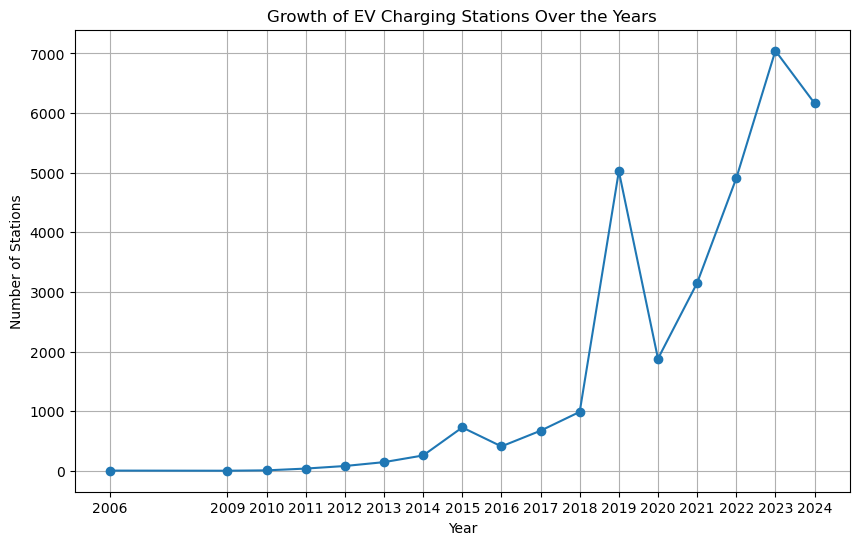

In [175]:
# Plot year-by-year trends
plt.figure(figsize=(10, 6))
stations_by_year.plot(kind='line', marker='o', title='Growth of EV Charging Stations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.xticks(stations_by_year.index)
plt.grid()
plt.show()

In [ ]:
#Observation:
#The line chart illustrates the steady growth of EV charging stations in Canada over the years. 
#Starting with modest growth until 2018, there is a significant spike in the number of stations from 2019 onward, 
#reflecting increased investment in EV infrastructure. 
#The dip in 2020 could be attributed to the COVID-19 pandemic, which likely impacted infrastructure projects. 
#However, the rapid growth from 2021 onward showcases a strong push toward supporting EV adoption and expanding charging accessibility across the country.

In [47]:
# Count the number of stations per province
stations_by_province = df['State'].value_counts()

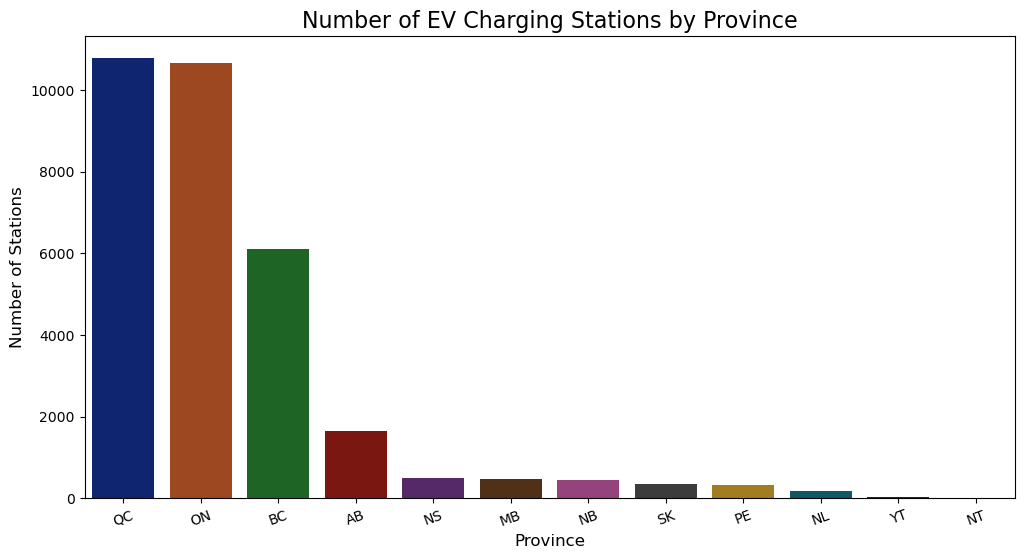

In [241]:
# Bar plot for province-wise distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=stations_by_province.index, y=stations_by_province.values, hue=stations_by_province.index,palette='dark') 
#Assigning a dummy hue to use palette &avoid warning
plt.title('Number of EV Charging Stations by Province', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.xticks(rotation=20)
plt.show()


In [ ]:
##Observation = The bar chart highlights the distribution of EV charging stations across provinces. 
#Quebec, Ontario, and British Columbia have the highest number of stations, showing a strong focus on EV infrastructure in these regions.

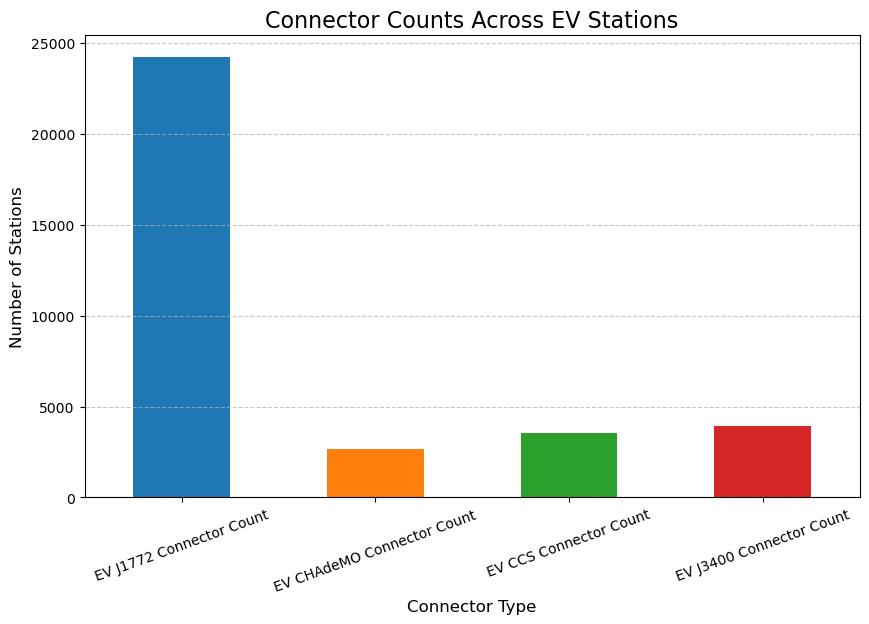

In [243]:
# Sum the counts of each connector type
connector_counts_by_type = df[['EV J1772 Connector Count', 'EV CHAdeMO Connector Count', 'EV CCS Connector Count', 'EV J3400 Connector Count']].sum()

# Plot as a bar chart
plt.figure(figsize=(10, 6))
connector_counts_by_type.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Connector Counts Across EV Stations', fontsize=16)
plt.xlabel('Connector Type', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
#Observation:
#The above bar chart displays the distribution of connector counts across EV stations in Canada. 
#The J1772 connector dominates, reflecting its widespread use in Level 2 charging infrastructure. 
#CHAdeMO, CCS, and J3400 connectors are less common and are critical for fast charging, supporting diverse EV models and use cases. 
#This distribution underscores the focus on both standard and fast charging infrastructure.

In [107]:
print(df["EV Connector Types"].unique()) #different types of EV connectors 

['J1772' 'CHADEMO J1772 J1772COMBO NEMA520' 'CHADEMO J1772COMBO'
 'J1772COMBO' 'TESLA' 'CHADEMO J1772 J1772COMBO' 'J1772 TESLA'
 'J1772 J1772COMBO' 'J1772 NEMA515' 'CHADEMO J1772' 'CHADEMO'
 'J1772 NEMA520' 'CHADEMO J1772 NEMA520' 'NEMA520' 'J1772COMBO TESLA'
 'CHADEMO J1772COMBO TESLA' 'J1772 NEMA1450']


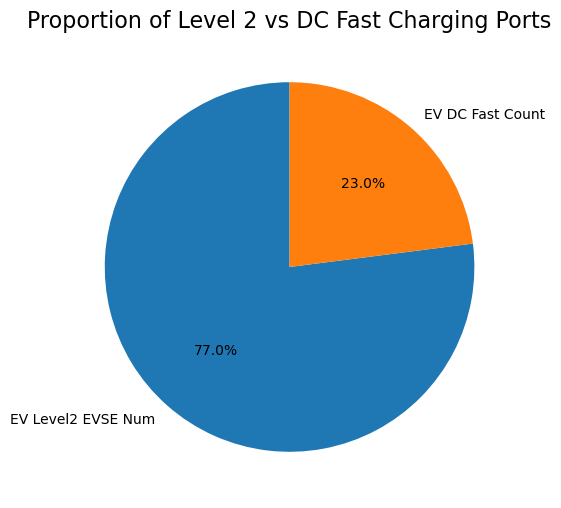

In [193]:
# Sum Level 2 and DC Fast charging ports
charging_counts = df[['EV Level2 EVSE Num', 'EV DC Fast Count']].sum()

# Plot a pie chart
plt.figure(figsize=(8, 6))
charging_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Proportion of Level 2 vs DC Fast Charging Ports', fontsize=16)
plt.ylabel('')  # Removing the y-axis label
plt.show()



In [ ]:
#Observation:
#The above pie chart shows the proportion of Level 2 and DC fast chargers in Canada’s EV charging network. 
#Level 2 chargers dominate, accounting for the majority of charging infrastructure, 
#while DC fast chargers make up a smaller but critical proportion for rapid charging needs.

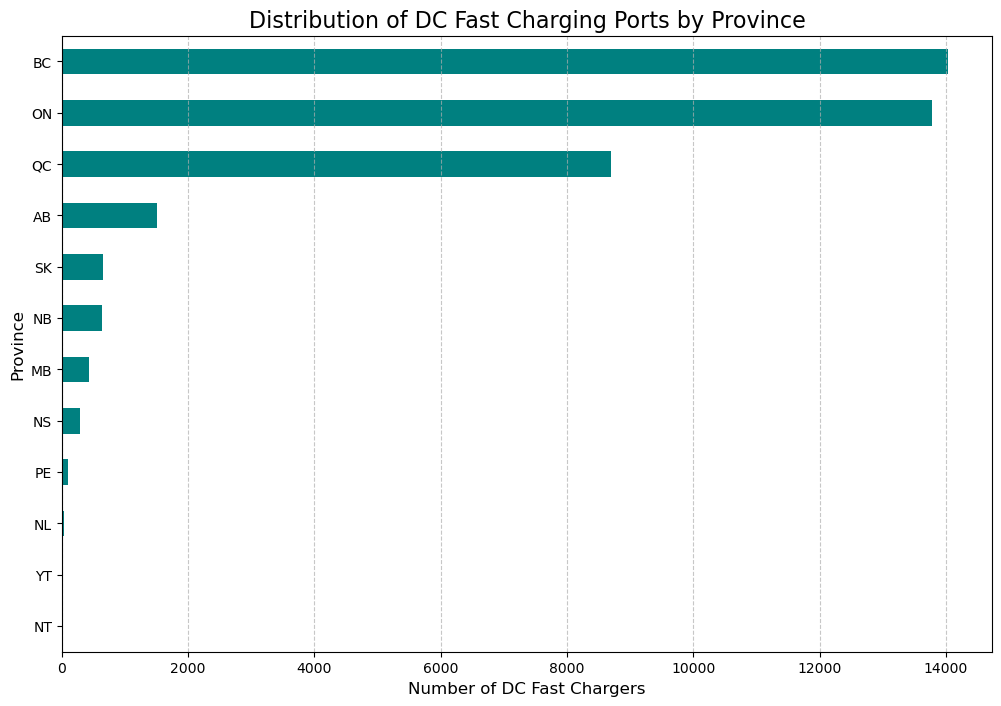

In [195]:
# Group by State and sum DC fast chargers
dc_fast_by_state = df.groupby('State')['EV DC Fast Count'].sum().sort_values()

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
dc_fast_by_state.plot(kind='barh', color='teal')
plt.title('Distribution of DC Fast Charging Ports by Province', fontsize=16)
plt.xlabel('Number of DC Fast Chargers', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Observation:
#The above horizontal bar chart highlights the distribution of DC fast chargers across provinces. 
#Quebec, Ontario, and British Columbia lead in fast charging infrastructure, 
#while smaller provinces have limited availability, potentially requiring more investments.

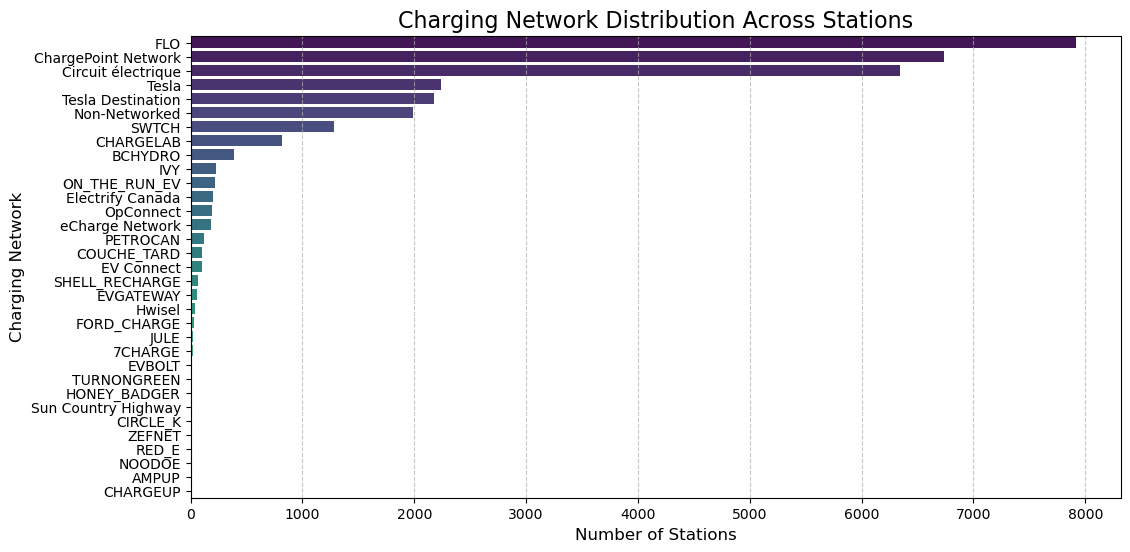

In [213]:
# Count stations by network
network_counts = df['EV Network'].value_counts()

# Plot a horizontal bar chart for clarity
plt.figure(figsize=(12, 6))
sns.barplot(x=network_counts.values, y=network_counts.index,hue=network_counts.index, palette='viridis')
plt.title('Charging Network Distribution Across Stations', fontsize=16)
plt.xlabel('Number of Stations', fontsize=12)
plt.ylabel('Charging Network', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Observation:
#The horizontal bar chart shows the distribution of charging stations across networks. 
#Flo and Tesla dominate, showcasing their extensive infrastructure. 
#Other networks contribute significantly in specific regions, supporting diverse EV user needs.

In [215]:
# Calculate the total number of stations per network
overall_top_networks = df['EV Network'].value_counts().head(5).index
print("Top 5 Charging Networks:", list(overall_top_networks))


Top 5 Charging Networks: ['FLO', 'ChargePoint Network', 'Circuit électrique', 'Tesla', 'Tesla Destination']


In [217]:
# Group by State and EV Network and count the stations
network_by_state = df.groupby(['State', 'EV Network']).size().unstack(fill_value=0)

# Filter for only the top 5 networks
top_network_by_state = network_by_state[overall_top_networks]


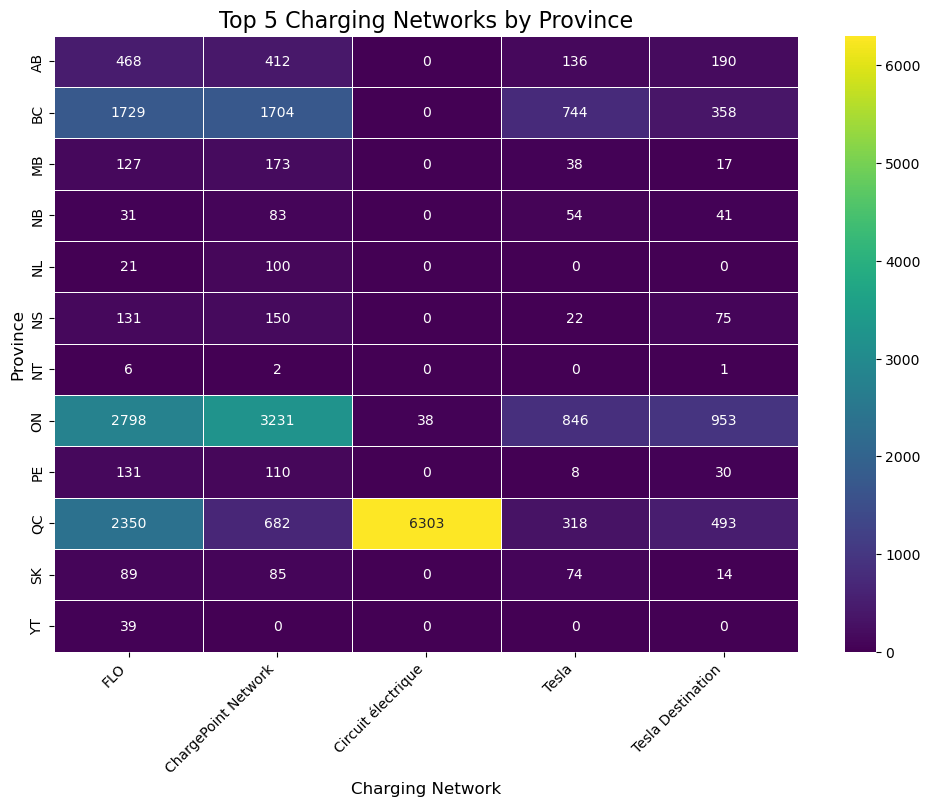

In [227]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_network_by_state, cmap="viridis", annot=True, fmt="d", linewidths=.5, cbar=True)
plt.title('Top 5 Charging Networks by Province', fontsize=16)
plt.xlabel('Charging Network', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#Observation:
#The above heatmap shows the distribution of the top 5 charging networks across provinces. 
#Flo is the most dominant network, with significant presence across most provinces. 
#Tesla has a strong presence in regions like Ontario and British Columbia. 
#Circuit électrique dominating in quebec and ChargePoint Network dominating in Ontario, reflecting their partnerships in key regions.

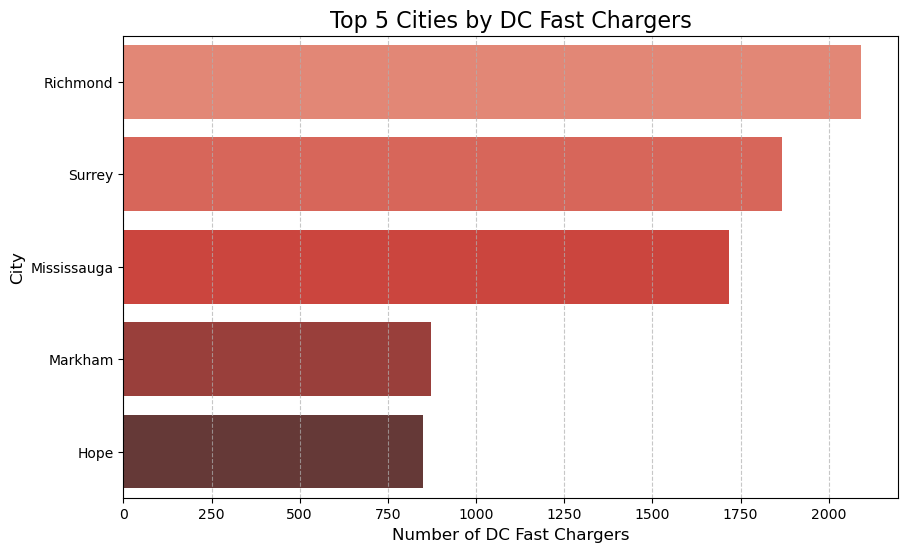

In [239]:
# Group by city and sum DC fast chargers
top_cities_dc_fast = df.groupby('City')['EV DC Fast Count'].sum().sort_values(ascending=False).head(5)

# Plot the top 5 cities by DC fast chargers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_dc_fast.values, y=top_cities_dc_fast.index,hue=top_cities_dc_fast.index, palette="Reds_d")
plt.title('Top 5 Cities by DC Fast Chargers', fontsize=16)
plt.xlabel('Number of DC Fast Chargers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Observation:
#The above chart shows the top 5 cities with the highest number of DC fast chargers. 
#These cities are crucial for enabling long-distance EV travel and reducing range anxiety.

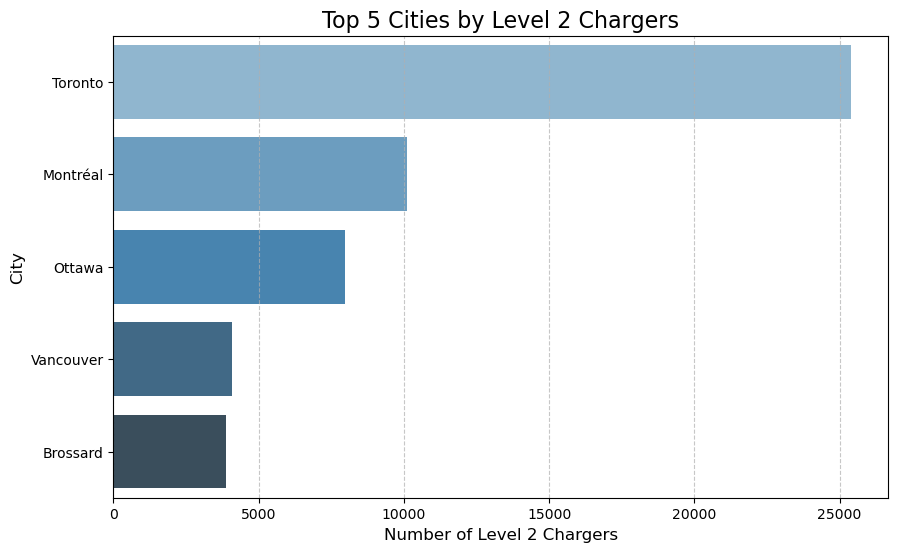

In [235]:
# Group by city and sum Level 2 chargers
top_cities_level2 = df.groupby('City')['EV Level2 EVSE Num'].sum().sort_values(ascending=False).head(5)

# Plot the top 5 cities by Level 2 chargers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_level2.values, y=top_cities_level2.index, hue=top_cities_level2.index,palette="Blues_d")
plt.title('Top 5 Cities by Level 2 Chargers', fontsize=16)
plt.xlabel('Number of Level 2 Chargers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Observation:
#The above chart highlights cities with the highest capacity for Level 2 chargers, 
#reflecting their focus on standard EV charging infrastructure.